# 유튜브에서 AI 봇의 활동 패턴과 사용자 반응 분석


##유튜브 영상에서 댓글 추출

In [ ]:
# 라이브러리 다운
!pip install google-api-python-client

In [ ]:
# 유튜브 영상 댓글 받아오기
from googleapiclient.discovery import build
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')

# YouTube API 클라이언트 설정
api_key = 'API 키 입력'
youtube = build('youtube', 'v3', developerKey=api_key)

# 각각 유튜브 영상의 ID를 추출하여 댓글을 수집
video_id = '유튜브 영상 ID 입력'
comments_data = []

# 댓글 수집 함수
def get_comments(youtube, video_id, max_results=100):
    next_page_token = None

    while True:
        # 댓글 요청
        request = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            maxResults=max_results,
            pageToken=next_page_token,
            textFormat="plainText"
        )
        response = request.execute()

        # 댓글 수집
        for item in response['items']:
            comment_id = item['id']
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            author = item['snippet']['topLevelComment']['snippet']['authorDisplayName']
            published_at = item['snippet']['topLevelComment']['snippet']['publishedAt']
            like_count = item['snippet']['topLevelComment']['snippet']['likeCount']
            comments_data.append([comment_id, author, comment, published_at, like_count, "Main Comment", None])

            # 답변이 있는 경우 함께 수집
            if item['snippet']['totalReplyCount'] > 0:
                get_replies(youtube, comment_id)

        next_page_token = response.get('nextPageToken')
        if not next_page_token:
            break

        time.sleep(1)

# 답변 수집 함수
def get_replies(youtube, parent_id, max_results=100):
    next_page_token = None

    while True:
        # 답변 요청
        request = youtube.comments().list(
            part='snippet',
            parentId=parent_id,  # 메인 댓글의 ID를 parent ID로 설정하여 답글과 연결
            maxResults=max_results,
            pageToken=next_page_token,
            textFormat="plainText"
        )
        response = request.execute()

        # 답변 수집
        for item in response['items']:
            reply_id = item['id']
            reply_comment = item['snippet']['textDisplay']
            reply_author = item['snippet']['authorDisplayName']
            reply_published_at = item['snippet']['publishedAt']
            reply_like_count = item['snippet']['likeCount']
            comments_data.append([reply_id, reply_author, reply_comment, reply_published_at, reply_like_count, "Reply", parent_id])

        next_page_token = response.get('nextPageToken')
        if not next_page_token:
            break

        time.sleep(1)

# 댓글 수집 실행
get_comments(youtube, video_id)

# 데이터프레임으로 변환하여 출력
df = pd.DataFrame(comments_data, columns=["Comment ID", "Author", "Comment", "Published At", "Likes", "Type", "Parent ID"])

                                             Comment ID  \
0                            UgwS9DbV9iDPDGK25ad4AaABAg   
1                            UgyMRnBRF1_bum2S5qZ4AaABAg   
2                            Ugyzq04gboLGDhkGNQV4AaABAg   
3                            UgzIgFIatAwKbyCnfx14AaABAg   
4                            UgxhgmTNJMufA-OFjD94AaABAg   
...                                                 ...   
9154                         UgzV3wtELFXrj-HmS054AaABAg   
9155                         Ugz8MAhHDnAF6XNC56J4AaABAg   
9156  Ugz8MAhHDnAF6XNC56J4AaABAg.A42cP4Vhnh1A42cW-l2Zzs   
9157                         UgxXP4yVDQxzGcKhN6B4AaABAg   
9158  UgxXP4yVDQxzGcKhN6B4AaABAg.A42cLfmucqiA42d0ViLyYe   

                      Author  \
0                     @종이비행선   
1            @WhythisGGoraji   
2                   @jup6816   
3                    @빛나요명클린   
4     @cockroachbachelor6444   
...                      ...   
9154                @오창근-z6w   
9155            @johnkim5668   
915

In [ ]:
df.head()

,Comment ID,Author,Comment,Published At,Likes,Type,Parent ID
0,UgwS9DbV9iDPDGK25ad4AaABAg,@종이비행선,왜 겟아웃이 떠오르지…?,2024-11-13T04:12:56Z,0,Main Comment,None
1,UgyMRnBRF1_bum2S5qZ4AaABAg,@WhythisGGoraji,조만간 인간도 인공배양하고 아기일때 뇌에 생명 유지 기능만 남겨두고 뇌사상태로 만든...,2024-11-13T04:04:38Z,0,Main Comment,None
2,Ugyzq04gboLGDhkGNQV4AaABAg,@jup6816,영상만 봐도 참 어설픈데..... 사기꾼 천국이네요. 힘겨운 상황에 놓인 분들을 ...,2024-11-12T16:07:13Z,0,Main Comment,None
3,UgzIgFIatAwKbyCnfx14AaABAg,@빛나요명클린,불가능해요,2024-11-12T11:27:26Z,0,Main Comment,None
4,UgxhgmTNJMufA-OFjD94AaABAg,@cockroachbachelor6444,문명1정도 발달하면 모든 말기 암수술 완치 인정 하지만 이것 신 영역으로 봐야한다,2024-11-12T11:10:26Z,0,Main Comment,None
...,...,...,...,...,...,...,...
9154,UgzV3wtELFXrj-HmS054AaABAg,@오창근-z6w,무서운 세상이 다가오고 있읍니다,2024-05-30T04:55:41Z,1,Main Comment,None
9155,Ugz8MAhHDnAF6XNC56J4AaABAg,@johnkim5668,수술대상자인 A와 B 중 수술에 성공해 최종적으로 살아남은 사람은 A씨 일까? B씨...,2024-05-30T04:55:28Z,1,Main Comment,None
9156,Ugz8MAhHDnAF6XNC56J4AaABAg.A42cP4Vhnh1A42cW-l2Zzs,@hggyfryu,퓨전 손오공이지,2024-05-30T04:56:24Z,0,Reply,Ugz8MAhHDnAF6XNC56J4AaABAg
9157,UgxXP4yVDQxzGcKhN6B4AaABAg,@gomvinn,다 그렇다치고 제일중요한 척추(목)뼈는요? 척추(목)를 봉합한다?!,2024-05-30T04:54:59Z,5,Main Comment,None


In [ ]:
# csv로 저장 -> 이 과정을 반복하여 댓글 수집
df.to_csv("'암환자 머리 통째로 기증자 몸에 이식'…로봇 시연영상에 '충격', 현실성 논란", index=False, encoding='utf-8-sig')

##데이터 전처리

### csv 파일 병합

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# 데이터 불러오기
df1 = pd.read_csv("/content/'2033년까지 정년 65세로 연장' 법안 발의")
df2 = pd.read_csv("/content/'암환자 머리 통째로 기증자 몸에 이식'…로봇 시연영상에 '충격', 현실성 논란")
df3 = pd.read_csv("/content/ILLIT (아일릿) ‘Cherish (My Love)’ Official MV")
df4 = pd.read_csv("/content/[뉴스 '꾹'] '무식한' '미쳤냐' '인마' 거침없던 尹.. '반말' 논란도")
df5 = pd.read_csv("/content/[뉴스 '꾹'] '수천 수만번 후회..사죄드려' '첫 사과'와 톤 달라진 제시")
df6 = pd.read_csv("/content/[뉴스 '꾹'] _74년 여대를 남녀공학 전환__ '근조 폭탄' 동덕여대 발칵")
df7 = pd.read_csv("/content/[오늘 이 뉴스] _앉으세요!_ 지시에 _아이X.._.._국감이 우습나_ 불호령")
df8 = pd.read_csv("/content/[풀영상] 민희진 긴급 기자회견..2시간 넘게 '모든 걸 쏟아냈다'")
df9 = pd.read_csv("/content/[한눈에 이슈] 요즘 누가 전기차 삽니까_ 등 돌린 결정적 이유")
df10 = pd.read_csv("/content/[현장영상] “한국 인구 3분의 1보다 적어질 것”…머스크가 웃음 그치더니 꺼낸 말")
df11 = pd.read_csv("/content/_방금 왜 사과를 준 거야__ 신기함 넘어 섬뜩한 대답")
df12 = pd.read_csv("/content/소환된 내 최애들은 무슨 죄_ ㅠㅠ 하이브-어도어 사태 정리해 봄")
df13 = pd.read_csv("/content/정몽규-홍명보가 우리 눈치 안 보는 이유! 박문성 '타골 분석'에 정몽규 회장 반응")
df14 = pd.read_csv("/content/하이브vs민희진, 누가 누구를 지지할까_")
df15 = pd.read_csv("/content/‘최선 다하지 않으셨잖아요’ 국정감사 출석한 뉴진스 하니의 일침 10분 정리")

In [ ]:
df1.head()

,Comment ID,Author,Comment,Published At,Likes,Type,Parent ID
0,UgyF481tTI0hqb0yuC54AaABAg,@읏짜-z6r,또 잔대가리만 굴리는구나!!\n정부에서 해야 할짓을 또 사업주들이나 일을 하게 만들...,2024-11-13T04:51:30Z,0,Main Comment,NaN
1,UgzjHbn5-wm_M3xSIvR4AaABAg,@jundk18,발의되면 뭐하노 지키는 사기업이 어디있냥 말이되냥,2024-11-12T13:53:44Z,0,Main Comment,NaN
2,UgwULQi52Txv0OxERRZ4AaABAg,@MrDongkun,쳐노는 55세 이상 직원들을 돈을 더 주라고?? 일안해도 강제 할수도 없는 기업문화...,2024-11-12T12:42:23Z,0,Main Comment,NaN
3,UgxpfRA6dI2DCUkHUbR4AaABAg,@MrDongkun,65년생은 갑자기 정년이 4년이 느네 64는 정년퇴직인데,2024-11-12T12:30:39Z,0,Main Comment,NaN
4,UgwVrbMWGqMRPtodtv54AaABAg,@s블루레빗,엄청난 베이비부머 세대가\n정년연장 안하고 연금 늦게받게되면 그 부양은 결국 취업한...,2024-11-11T23:19:18Z,0,Main Comment,NaN
...,...,...,...,...,...,...,...
2084,Ugxj6zWzCvFA1C2Yo9Z4AaABAg,@kimchanyyyy,고용은 더더욱 감소~,2024-08-20T05:23:12Z,5,Main Comment,NaN
2085,UgzFZFenDfr18OzWPtF4AaABAg,@한서교-p2q,정년연장 2년정도만 해주어도 \n국민연금 고갈 안될것같네요\n\n베이비부머 세대 고...,2024-08-20T05:15:44Z,1,Main Comment,NaN
2086,Ugz5pohubMkNPzb_Dbx4AaABAg,@초막풍-w6g,60세정년자는 거의 공무원 대기업 공기업직원인데\n절대반대합니다~\n이들은 또 최고...,2024-08-20T05:07:48Z,15,Main Comment,NaN
2087,Ugz5pohubMkNPzb_Dbx4AaABAg.A7Ln-DRyB1gA7Lnnf7gsUL,@한서교-p2q,니는 뭔데?\n정신병이가 \n니가 연금을 많이 내던지,2024-08-20T05:14:49Z,0,Reply,Ugz5pohubMkNPzb_Dbx4AaABAg


In [ ]:
# 각각 데이터마다 column(분야, 유튜브 제목) 설정

df1["Class"] = "정치"; df1["Title"] = "2033년까지 정년 65세로 연장' 법안 발의"
df2["Class"] = "기술"; df2["Title"] = "암환자 머리 통째로 기증자 몸에 이식'…로봇 시연영상에 '충격', 현실성 논란"
df3["Class"] = "연예"; df3["Title"] = "ILLIT (아일릿) ‘Cherish (My Love)’ Official MV"
df4["Class"] = "정치"; df4["Title"] = "'무식한' '미쳤냐' '인마' 거침없던 尹.. '반말' 논란도"
df5["Class"] = "연예"; df5["Title"] = "'수천 수만번 후회..사죄드려' '첫 사과'와 톤 달라진 제시"
df6["Class"] = "정치"; df6["Title"] = "_74년 여대를 남녀공학 전환__ '근조 폭탄' 동덕여대 발칵"
df7["Class"] = "정치"; df7["Title"] = "_앉으세요!_ 지시에 _아이X.._.._국감이 우습나_ 불호령"
df8["Class"] = "연예"; df8["Title"] = "민희진 긴급 기자회견..2시간 넘게 '모든 걸 쏟아냈다'"
df9["Class"] = "기술"; df9["Title"] = "요즘 누가 전기차 삽니까_ 등 돌린 결정적 이유"
df10["Class"] = "정치"; df10["Title"] = "'한국 인구 3분의 1보다 적어질 것'…머스크가 웃음 그치더니 꺼낸 말"
df11["Class"] = "기술"; df11["Title"] = "방금 왜 사과를 준 거야__ 신기함 넘어 섬뜩한 대답"
df12["Class"] = "연예"; df12["Title"] = "소환된 내 최애들은 무슨 죄_ ㅠㅠ 하이브-어도어 사태 정리해 봄"
df13["Class"] = "정치"; df13["Title"] = "정몽규-홍명보가 우리 눈치 안 보는 이유! 박문성 '타골 분석'에 정몽규 회장 반응"
df14["Class"] = "연예"; df14["Title"] = "하이브vs민희진, 누가 누구를 지지할까_"
df15["Class"] = "연예"; df15["Title"] = "‘최선 다하지 않으셨잖아요’ 국정감사 출석한 뉴진스 하니의 일침 10분 정리"

In [ ]:
df1.head()

,Comment ID,Author,Comment,Published At,Likes,Type,Parent ID,Class,Title
0,UgyF481tTI0hqb0yuC54AaABAg,@읏짜-z6r,또 잔대가리만 굴리는구나!!\n정부에서 해야 할짓을 또 사업주들이나 일을 하게 만들...,2024-11-13T04:51:30Z,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의
1,UgzjHbn5-wm_M3xSIvR4AaABAg,@jundk18,발의되면 뭐하노 지키는 사기업이 어디있냥 말이되냥,2024-11-12T13:53:44Z,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의
2,UgwULQi52Txv0OxERRZ4AaABAg,@MrDongkun,쳐노는 55세 이상 직원들을 돈을 더 주라고?? 일안해도 강제 할수도 없는 기업문화...,2024-11-12T12:42:23Z,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의
3,UgxpfRA6dI2DCUkHUbR4AaABAg,@MrDongkun,65년생은 갑자기 정년이 4년이 느네 64는 정년퇴직인데,2024-11-12T12:30:39Z,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의
4,UgwVrbMWGqMRPtodtv54AaABAg,@s블루레빗,엄청난 베이비부머 세대가\n정년연장 안하고 연금 늦게받게되면 그 부양은 결국 취업한...,2024-11-11T23:19:18Z,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의
...,...,...,...,...,...,...,...,...,...
2084,Ugxj6zWzCvFA1C2Yo9Z4AaABAg,@kimchanyyyy,고용은 더더욱 감소~,2024-08-20T05:23:12Z,5,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의
2085,UgzFZFenDfr18OzWPtF4AaABAg,@한서교-p2q,정년연장 2년정도만 해주어도 \n국민연금 고갈 안될것같네요\n\n베이비부머 세대 고...,2024-08-20T05:15:44Z,1,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의
2086,Ugz5pohubMkNPzb_Dbx4AaABAg,@초막풍-w6g,60세정년자는 거의 공무원 대기업 공기업직원인데\n절대반대합니다~\n이들은 또 최고...,2024-08-20T05:07:48Z,15,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의
2087,Ugz5pohubMkNPzb_Dbx4AaABAg.A7Ln-DRyB1gA7Lnnf7gsUL,@한서교-p2q,니는 뭔데?\n정신병이가 \n니가 연금을 많이 내던지,2024-08-20T05:14:49Z,0,Reply,Ugz5pohubMkNPzb_Dbx4AaABAg,정치,2033년까지 정년 65세로 연장' 법안 발의


In [ ]:
# 데이터프레임을 합친 후 저장

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15])
df.head()

                                             Comment ID          Author  \
0                            UgyF481tTI0hqb0yuC54AaABAg         @읏짜-z6r   
1                            UgzjHbn5-wm_M3xSIvR4AaABAg        @jundk18   
2                            UgwULQi52Txv0OxERRZ4AaABAg      @MrDongkun   
3                            UgxpfRA6dI2DCUkHUbR4AaABAg      @MrDongkun   
4                            UgwVrbMWGqMRPtodtv54AaABAg          @s블루레빗   
...                                                 ...             ...   
6915  Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DA9m5IbvPt5v       @냥이집사-w6c   
6916  Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DA9uGfF7cvAr    @bgc9999-z2b   
6917  Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DAAQVgeIKGDU  @robertkim4075   
6918                         UgyQUumLLuCemq3Uw9V4AaABAg       @신중현-No.1   
6919                         UgxdlpjFqEQdwTm-wQB4AaABAg        @이찬우-d5w   

                                                Comment          Published At  \
0     또 잔대가리만 굴리는구

In [ ]:
df.to_csv("유튜브 댓글 모음.csv", index=False, encoding='utf-8-sig')

### 형변환, 한국어 필터링 등 기본적인 전처리

In [ ]:
import pandas as pd

df = pd.read_csv("/content/유튜브 댓글 모음.csv")

df.head()

,Comment ID,Author,Comment,Published At,Likes,Type,Parent ID,Class,Title
0,UgyF481tTI0hqb0yuC54AaABAg,@읏짜-z6r,또 잔대가리만 굴리는구나!!\n정부에서 해야 할짓을 또 사업주들이나 일을 하게 만들...,2024-11-13T04:51:30Z,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의
1,UgzjHbn5-wm_M3xSIvR4AaABAg,@jundk18,발의되면 뭐하노 지키는 사기업이 어디있냥 말이되냥,2024-11-12T13:53:44Z,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의
2,UgwULQi52Txv0OxERRZ4AaABAg,@MrDongkun,쳐노는 55세 이상 직원들을 돈을 더 주라고?? 일안해도 강제 할수도 없는 기업문화...,2024-11-12T12:42:23Z,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의
3,UgxpfRA6dI2DCUkHUbR4AaABAg,@MrDongkun,65년생은 갑자기 정년이 4년이 느네 64는 정년퇴직인데,2024-11-12T12:30:39Z,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의
4,UgwVrbMWGqMRPtodtv54AaABAg,@s블루레빗,엄청난 베이비부머 세대가\n정년연장 안하고 연금 늦게받게되면 그 부양은 결국 취업한...,2024-11-11T23:19:18Z,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의
...,...,...,...,...,...,...,...,...,...
143944,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DA9m5IbvPt5v,@냥이집사-w6c,저렇게어린친구가 ..에휴,2024-10-19T12:38:45Z,0,Reply,Ugy-wfHjGgo6QGGmcMN4AaABAg,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...
143945,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DA9uGfF7cvAr,@bgc9999-z2b,그럼 가게 사장하고 직원하고 일하면 누가 돈을 더 벌겠어요? 당연한거 아닌가?,2024-10-22T16:52:01Z,0,Reply,Ugy-wfHjGgo6QGGmcMN4AaABAg,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...
143946,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DAAQVgeIKGDU,@robertkim4075,민희진 뉴진스 데리고 앵벌이하냐?\n어린애들한테 뭘 시키는거야\n보는데 민희진 지가...,2024-11-04T14:38:13Z,0,Reply,Ugy-wfHjGgo6QGGmcMN4AaABAg,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...
143947,UgyQUumLLuCemq3Uw9V4AaABAg,@신중현-No.1,불쌍하다 어린애가 저런 어른들 사이에 껴서 이용당하는 모양이 안타깝다,2024-10-15T13:14:20Z,438,Main Comment,NaN,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...


In [ ]:
# 결측값 확인
# 중복데이터는 ai봇을 구별해낼 수 있는 요소 중 하나이므로 제거하지 않고 진행

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143949 entries, 0 to 143948
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Comment ID    143949 non-null  object
 1   Author        143936 non-null  object
 2   Comment       143929 non-null  object
 3   Published At  143949 non-null  object
 4   Likes         143949 non-null  int64 
 5   Type          143949 non-null  object
 6   Parent ID     39255 non-null   object
 7   Class         143949 non-null  object
 8   Title         143949 non-null  object
dtypes: int64(1), object(8)
memory usage: 9.9+ MB


In [ ]:
# Published At의 포맷을 변화

from datetime import datetime

df['Published At'] = pd.to_datetime(df['Published At']).dt.strftime('%Y-%m-%d %H:%M:%S')

,Comment ID,Author,Comment,Published At,Likes,Type,Parent ID,Class,Title
0,UgyF481tTI0hqb0yuC54AaABAg,@읏짜-z6r,또 잔대가리만 굴리는구나!!\n정부에서 해야 할짓을 또 사업주들이나 일을 하게 만들...,2024-11-13 04:51:30,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의
1,UgzjHbn5-wm_M3xSIvR4AaABAg,@jundk18,발의되면 뭐하노 지키는 사기업이 어디있냥 말이되냥,2024-11-12 13:53:44,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의
2,UgwULQi52Txv0OxERRZ4AaABAg,@MrDongkun,쳐노는 55세 이상 직원들을 돈을 더 주라고?? 일안해도 강제 할수도 없는 기업문화...,2024-11-12 12:42:23,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의
3,UgxpfRA6dI2DCUkHUbR4AaABAg,@MrDongkun,65년생은 갑자기 정년이 4년이 느네 64는 정년퇴직인데,2024-11-12 12:30:39,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의
4,UgwVrbMWGqMRPtodtv54AaABAg,@s블루레빗,엄청난 베이비부머 세대가\n정년연장 안하고 연금 늦게받게되면 그 부양은 결국 취업한...,2024-11-11 23:19:18,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의
...,...,...,...,...,...,...,...,...,...
143944,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DA9m5IbvPt5v,@냥이집사-w6c,저렇게어린친구가 ..에휴,2024-10-19 12:38:45,0,Reply,Ugy-wfHjGgo6QGGmcMN4AaABAg,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...
143945,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DA9uGfF7cvAr,@bgc9999-z2b,그럼 가게 사장하고 직원하고 일하면 누가 돈을 더 벌겠어요? 당연한거 아닌가?,2024-10-22 16:52:01,0,Reply,Ugy-wfHjGgo6QGGmcMN4AaABAg,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...
143946,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DAAQVgeIKGDU,@robertkim4075,민희진 뉴진스 데리고 앵벌이하냐?\n어린애들한테 뭘 시키는거야\n보는데 민희진 지가...,2024-11-04 14:38:13,0,Reply,Ugy-wfHjGgo6QGGmcMN4AaABAg,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...
143947,UgyQUumLLuCemq3Uw9V4AaABAg,@신중현-No.1,불쌍하다 어린애가 저런 어른들 사이에 껴서 이용당하는 모양이 안타깝다,2024-10-15 13:14:20,438,Main Comment,NaN,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...


In [ ]:
# 'Comment' column에서 특수문자 제거
import re

# 특수문자 제거 (HTML 태그, \n, 따옴표 포함)
df['Reply'] = df['Comment'].astype(str).map(
    lambda x: re.sub(r'[\n\r\t\"\']|<.*?>|[^\w\s]', '', x)
)

In [ ]:
df.drop('Comment', axis=1, inplace=True)

In [ ]:
df.head()

,Comment ID,Author,Published At,Likes,Type,Parent ID,Class,Title,Reply
0,UgyF481tTI0hqb0yuC54AaABAg,@읏짜-z6r,2024-11-13 04:51:30,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의,또 잔대가리만 굴리는구나정부에서 해야 할짓을 또 사업주들이나 일을 하게 만들어 죽을...
1,UgzjHbn5-wm_M3xSIvR4AaABAg,@jundk18,2024-11-12 13:53:44,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의,발의되면 뭐하노 지키는 사기업이 어디있냥 말이되냥
2,UgwULQi52Txv0OxERRZ4AaABAg,@MrDongkun,2024-11-12 12:42:23,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의,쳐노는 55세 이상 직원들을 돈을 더 주라고 일안해도 강제 할수도 없는 기업문화 자...
3,UgxpfRA6dI2DCUkHUbR4AaABAg,@MrDongkun,2024-11-12 12:30:39,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의,65년생은 갑자기 정년이 4년이 느네 64는 정년퇴직인데
4,UgwVrbMWGqMRPtodtv54AaABAg,@s블루레빗,2024-11-11 23:19:18,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의,엄청난 베이비부머 세대가정년연장 안하고 연금 늦게받게되면 그 부양은 결국 취업한 청...
...,...,...,...,...,...,...,...,...,...
143944,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DA9m5IbvPt5v,@냥이집사-w6c,2024-10-19 12:38:45,0,Reply,Ugy-wfHjGgo6QGGmcMN4AaABAg,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,저렇게어린친구가 에휴
143945,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DA9uGfF7cvAr,@bgc9999-z2b,2024-10-22 16:52:01,0,Reply,Ugy-wfHjGgo6QGGmcMN4AaABAg,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,그럼 가게 사장하고 직원하고 일하면 누가 돈을 더 벌겠어요 당연한거 아닌가
143946,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DAAQVgeIKGDU,@robertkim4075,2024-11-04 14:38:13,0,Reply,Ugy-wfHjGgo6QGGmcMN4AaABAg,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,민희진 뉴진스 데리고 앵벌이하냐어린애들한테 뭘 시키는거야보는데 민희진 지가하고 싶은...
143947,UgyQUumLLuCemq3Uw9V4AaABAg,@신중현-No.1,2024-10-15 13:14:20,438,Main Comment,NaN,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,불쌍하다 어린애가 저런 어른들 사이에 껴서 이용당하는 모양이 안타깝다


In [ ]:
# 너무 짧은 reply는 삭제

df = df[df['Reply'].str.len() > 3]

,Comment ID,Author,Published At,Likes,Type,Parent ID,Class,Title,Reply
0,UgyF481tTI0hqb0yuC54AaABAg,@읏짜-z6r,2024-11-13 04:51:30,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의,또 잔대가리만 굴리는구나정부에서 해야 할짓을 또 사업주들이나 일을 하게 만들어 죽을...
1,UgzjHbn5-wm_M3xSIvR4AaABAg,@jundk18,2024-11-12 13:53:44,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의,발의되면 뭐하노 지키는 사기업이 어디있냥 말이되냥
2,UgwULQi52Txv0OxERRZ4AaABAg,@MrDongkun,2024-11-12 12:42:23,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의,쳐노는 55세 이상 직원들을 돈을 더 주라고 일안해도 강제 할수도 없는 기업문화 자...
3,UgxpfRA6dI2DCUkHUbR4AaABAg,@MrDongkun,2024-11-12 12:30:39,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의,65년생은 갑자기 정년이 4년이 느네 64는 정년퇴직인데
4,UgwVrbMWGqMRPtodtv54AaABAg,@s블루레빗,2024-11-11 23:19:18,0,Main Comment,NaN,정치,2033년까지 정년 65세로 연장' 법안 발의,엄청난 베이비부머 세대가정년연장 안하고 연금 늦게받게되면 그 부양은 결국 취업한 청...
...,...,...,...,...,...,...,...,...,...
143944,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DA9m5IbvPt5v,@냥이집사-w6c,2024-10-19 12:38:45,0,Reply,Ugy-wfHjGgo6QGGmcMN4AaABAg,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,저렇게어린친구가 에휴
143945,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DA9uGfF7cvAr,@bgc9999-z2b,2024-10-22 16:52:01,0,Reply,Ugy-wfHjGgo6QGGmcMN4AaABAg,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,그럼 가게 사장하고 직원하고 일하면 누가 돈을 더 벌겠어요 당연한거 아닌가
143946,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DAAQVgeIKGDU,@robertkim4075,2024-11-04 14:38:13,0,Reply,Ugy-wfHjGgo6QGGmcMN4AaABAg,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,민희진 뉴진스 데리고 앵벌이하냐어린애들한테 뭘 시키는거야보는데 민희진 지가하고 싶은...
143947,UgyQUumLLuCemq3Uw9V4AaABAg,@신중현-No.1,2024-10-15 13:14:20,438,Main Comment,NaN,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,불쌍하다 어린애가 저런 어른들 사이에 껴서 이용당하는 모양이 안타깝다


In [ ]:
# 한국어 필터링을 위한 라이브러리 설치
!pip install langid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=0d7da963a3050d109231ceaf8db0789eeddd137fa2937618e6a63b28ff0315b9
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [ ]:
# 언어 설정
import langid

langid.set_languages(['ko', 'en'])

In [ ]:
# 한국어만 필터링하여 출력
df['Language'] = df['Reply'].apply(lambda x: langid.classify(x)[0])
df_korean = df[df['Language'] == 'ko']

df_korean.head()

                                               Comment ID          Author  \
0                              UgyF481tTI0hqb0yuC54AaABAg         @읏짜-z6r   
1                              UgzjHbn5-wm_M3xSIvR4AaABAg        @jundk18   
2                              UgwULQi52Txv0OxERRZ4AaABAg      @MrDongkun   
3                              UgxpfRA6dI2DCUkHUbR4AaABAg      @MrDongkun   
4                              UgwVrbMWGqMRPtodtv54AaABAg          @s블루레빗   
...                                                   ...             ...   
143944  Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DA9m5IbvPt5v       @냥이집사-w6c   
143945  Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DA9uGfF7cvAr    @bgc9999-z2b   
143946  Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DAAQVgeIKGDU  @robertkim4075   
143947                         UgyQUumLLuCemq3Uw9V4AaABAg       @신중현-No.1   
143948                         UgxdlpjFqEQdwTm-wQB4AaABAg        @이찬우-d5w   

               Published At  Likes          Type                   Parent I

<ipython-input-11-a78f53e96306>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Language'] = df['Reply'].apply(lambda x: langid.classify(x)[0])


In [ ]:
df_korean.drop('Language', axis=1, inplace=True)

<ipython-input-12-1b2e69e97237>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_korean.drop('Language', axis=1, inplace=True)


In [ ]:
# 댓글 - 답변 구조 정리
# 답변이 아닌 메인 댓글의 'Parent ID'는 None으로 설정
df_korean["Parent ID"].fillna("None", inplace=True)

<ipython-input-16-9ba3eed0787d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_korean["Parent ID"].fillna("None", inplace=True)


,Comment ID,Author,Published At,Likes,Type,Parent ID,Class,Title,Reply
0,UgyF481tTI0hqb0yuC54AaABAg,@읏짜-z6r,2024-11-13 04:51:30,0,Main Comment,None,정치,2033년까지 정년 65세로 연장' 법안 발의,또 잔대가리만 굴리는구나정부에서 해야 할짓을 또 사업주들이나 일을 하게 만들어 죽을...
1,UgzjHbn5-wm_M3xSIvR4AaABAg,@jundk18,2024-11-12 13:53:44,0,Main Comment,None,정치,2033년까지 정년 65세로 연장' 법안 발의,발의되면 뭐하노 지키는 사기업이 어디있냥 말이되냥
2,UgwULQi52Txv0OxERRZ4AaABAg,@MrDongkun,2024-11-12 12:42:23,0,Main Comment,None,정치,2033년까지 정년 65세로 연장' 법안 발의,쳐노는 55세 이상 직원들을 돈을 더 주라고 일안해도 강제 할수도 없는 기업문화 자...
3,UgxpfRA6dI2DCUkHUbR4AaABAg,@MrDongkun,2024-11-12 12:30:39,0,Main Comment,None,정치,2033년까지 정년 65세로 연장' 법안 발의,65년생은 갑자기 정년이 4년이 느네 64는 정년퇴직인데
4,UgwVrbMWGqMRPtodtv54AaABAg,@s블루레빗,2024-11-11 23:19:18,0,Main Comment,None,정치,2033년까지 정년 65세로 연장' 법안 발의,엄청난 베이비부머 세대가정년연장 안하고 연금 늦게받게되면 그 부양은 결국 취업한 청...
...,...,...,...,...,...,...,...,...,...
117906,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DA9m5IbvPt5v,@냥이집사-w6c,2024-10-19 12:38:45,0,Reply,Ugy-wfHjGgo6QGGmcMN4AaABAg,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,저렇게어린친구가 에휴
117907,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DA9uGfF7cvAr,@bgc9999-z2b,2024-10-22 16:52:01,0,Reply,Ugy-wfHjGgo6QGGmcMN4AaABAg,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,그럼 가게 사장하고 직원하고 일하면 누가 돈을 더 벌겠어요 당연한거 아닌가
117908,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DAAQVgeIKGDU,@robertkim4075,2024-11-04 14:38:13,0,Reply,Ugy-wfHjGgo6QGGmcMN4AaABAg,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,민희진 뉴진스 데리고 앵벌이하냐어린애들한테 뭘 시키는거야보는데 민희진 지가하고 싶은...
117909,UgyQUumLLuCemq3Uw9V4AaABAg,@신중현-No.1,2024-10-15 13:14:20,438,Main Comment,None,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,불쌍하다 어린애가 저런 어른들 사이에 껴서 이용당하는 모양이 안타깝다


In [ ]:
# 결측치 확인 -> 'Author'에만 존재
df_korean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117911 entries, 0 to 117910
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Comment ID    117911 non-null  object
 1   Author        117900 non-null  object
 2   Published At  117911 non-null  object
 3   Likes         117911 non-null  int64 
 4   Type          117911 non-null  object
 5   Parent ID     117911 non-null  object
 6   Class         117911 non-null  object
 7   Title         117911 non-null  object
 8   Reply         117911 non-null  object
dtypes: int64(1), object(8)
memory usage: 8.1+ MB


In [ ]:
# 'Author'가 NaN인 데이터 확인
df_korean[df_korean['Author'].isnull()]

,Comment ID,Author,Published At,Likes,Type,Parent ID,Class,Title,Reply
2461,Ugx4pfgQbMGu60VW6eR4AaABAg,NaN,2024-10-14 12:48:08,0,Main Comment,None,기술,암환자 머리 통째로 기증자 몸에 이식'…로ᄇ...,저정도 AI기술이면 두명다 살리수 있는거 아님 ㅋㅋ
32470,UgyfL68D09QgqgTy1yN4AaABAg,NaN,2024-11-07 09:55:20,0,Main Comment,None,정치,'무식한' '미쳤냐' '인마' 거침없던 尹.. '...,말하는 수준이저게 진짜 대통령임그냥 아프리카비제이같은데
33263,UgzoOt_GcRAlS-ysxV94AaABAg,NaN,2024-11-07 09:47:32,0,Main Comment,None,정치,'무식한' '미쳤냐' '인마' 거침없던 尹.. '...,건달 건달
37468,Ugz4KUwDOld7-bQYx-94AaABAg,NaN,2024-11-07 09:13:13,0,Main Comment,None,정치,'무식한' '미쳤냐' '인마' 거침없던 尹.. '...,기자회견 말이 아깝다 에이 짜증난 기자회견
45189,Ugy4RvqC44jQl5_6R5x4AaABAg,NaN,2024-10-24 03:36:10,14,Main Comment,None,연예,'수천 수만번 후회..사죄드려' '첫 사과'와 ᄐ...,이미 인성이 드러났는데 미국가라 너네나라가서 그런행실을 하던말던 사람은 안바뀐다 특...
59251,UgwEvUNJRr6uqm7gFJR4AaABAg,NaN,2024-10-16 10:42:42,0,Main Comment,None,정치,_앉으세요!_ 지시에 _아이X.._.._국감이 우습...,강성노조는 없어저야 한다
60538,UgwqgCKF9e4o637JMs94AaABAg,NaN,2024-10-15 07:32:44,0,Main Comment,None,정치,_앉으세요!_ 지시에 _아이X.._.._국감이 우습...,국회의원 너네가 우습겠찌ㄱ동안 해온 짓거리들이 많으니
73913,UgwEX2cIAIYJOzEzrgl4AaABAg,NaN,2024-05-18 21:21:37,0,Main Comment,None,기술,요즘 누가 전기차 삽니까_ 등 돌린 결정ᄌ...,남아도는 보조금이라면 차량보조금 더 올려라 3년전같이그러면 대박난다화물차는 내연기관...
80640,UgyHm9OVSFDFreKV-vN4AaABAg,NaN,2024-11-04 19:45:25,0,Main Comment,None,정치,'한국 인구 3분의 1보다 적어질 것'…머스ᄏ...,집없어 좋은 일자리 없어 좋은 사람 만나기 힘들어 누가 애 낳아
91126,UgwY4NA_yiDMA6X0B8V4AaABAg,NaN,2024-03-14 12:19:33,0,Main Comment,None,기술,방금 왜 사과를 준 거야__ 신기함 넘어 서...,AI는 AI를 만들던 상관없이AI를 만든 인간들은 사과 처먹고 사과하는게 맞으니사과...


In [ ]:
# NaN값이 있는 행은 삭제하여 새로운 데이터프레임 생성
df_total = df_korean.dropna(axis=0)

In [ ]:
# index 정렬
df_total = df_total.sort_index(ascending=True)

,Comment ID,Author,Published At,Likes,Type,Parent ID,Class,Title,Reply
0,UgyF481tTI0hqb0yuC54AaABAg,@읏짜-z6r,2024-11-13 04:51:30,0,Main Comment,None,정치,2033년까지 정년 65세로 연장' 법안 발의,또 잔대가리만 굴리는구나정부에서 해야 할짓을 또 사업주들이나 일을 하게 만들어 죽을...
1,UgzjHbn5-wm_M3xSIvR4AaABAg,@jundk18,2024-11-12 13:53:44,0,Main Comment,None,정치,2033년까지 정년 65세로 연장' 법안 발의,발의되면 뭐하노 지키는 사기업이 어디있냥 말이되냥
2,UgwULQi52Txv0OxERRZ4AaABAg,@MrDongkun,2024-11-12 12:42:23,0,Main Comment,None,정치,2033년까지 정년 65세로 연장' 법안 발의,쳐노는 55세 이상 직원들을 돈을 더 주라고 일안해도 강제 할수도 없는 기업문화 자...
3,UgxpfRA6dI2DCUkHUbR4AaABAg,@MrDongkun,2024-11-12 12:30:39,0,Main Comment,None,정치,2033년까지 정년 65세로 연장' 법안 발의,65년생은 갑자기 정년이 4년이 느네 64는 정년퇴직인데
4,UgwVrbMWGqMRPtodtv54AaABAg,@s블루레빗,2024-11-11 23:19:18,0,Main Comment,None,정치,2033년까지 정년 65세로 연장' 법안 발의,엄청난 베이비부머 세대가정년연장 안하고 연금 늦게받게되면 그 부양은 결국 취업한 청...
...,...,...,...,...,...,...,...,...,...
117906,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DA9m5IbvPt5v,@냥이집사-w6c,2024-10-19 12:38:45,0,Reply,Ugy-wfHjGgo6QGGmcMN4AaABAg,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,저렇게어린친구가 에휴
117907,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DA9uGfF7cvAr,@bgc9999-z2b,2024-10-22 16:52:01,0,Reply,Ugy-wfHjGgo6QGGmcMN4AaABAg,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,그럼 가게 사장하고 직원하고 일하면 누가 돈을 더 벌겠어요 당연한거 아닌가
117908,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DAAQVgeIKGDU,@robertkim4075,2024-11-04 14:38:13,0,Reply,Ugy-wfHjGgo6QGGmcMN4AaABAg,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,민희진 뉴진스 데리고 앵벌이하냐어린애들한테 뭘 시키는거야보는데 민희진 지가하고 싶은...
117909,UgyQUumLLuCemq3Uw9V4AaABAg,@신중현-No.1,2024-10-15 13:14:20,438,Main Comment,None,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,불쌍하다 어린애가 저런 어른들 사이에 껴서 이용당하는 모양이 안타깝다


In [ ]:
# 댓글과 답변을 매핑하기 위해 행마다 1부터 고유 숫자 부여
df_total["Comment Number"] = range(1, len(df_total) + 1)

In [ ]:
df_total.head()

,Comment ID,Author,Published At,Likes,Type,Parent ID,Class,Title,Reply,Comment Number
0,UgyF481tTI0hqb0yuC54AaABAg,@읏짜-z6r,2024-11-13 04:51:30,0,Main Comment,None,정치,2033년까지 정년 65세로 연장' 법안 발의,또 잔대가리만 굴리는구나정부에서 해야 할짓을 또 사업주들이나 일을 하게 만들어 죽을...,1
1,UgzjHbn5-wm_M3xSIvR4AaABAg,@jundk18,2024-11-12 13:53:44,0,Main Comment,None,정치,2033년까지 정년 65세로 연장' 법안 발의,발의되면 뭐하노 지키는 사기업이 어디있냥 말이되냥,2
2,UgwULQi52Txv0OxERRZ4AaABAg,@MrDongkun,2024-11-12 12:42:23,0,Main Comment,None,정치,2033년까지 정년 65세로 연장' 법안 발의,쳐노는 55세 이상 직원들을 돈을 더 주라고 일안해도 강제 할수도 없는 기업문화 자...,3
3,UgxpfRA6dI2DCUkHUbR4AaABAg,@MrDongkun,2024-11-12 12:30:39,0,Main Comment,None,정치,2033년까지 정년 65세로 연장' 법안 발의,65년생은 갑자기 정년이 4년이 느네 64는 정년퇴직인데,4
4,UgwVrbMWGqMRPtodtv54AaABAg,@s블루레빗,2024-11-11 23:19:18,0,Main Comment,None,정치,2033년까지 정년 65세로 연장' 법안 발의,엄청난 베이비부머 세대가정년연장 안하고 연금 늦게받게되면 그 부양은 결국 취업한 청...,5
...,...,...,...,...,...,...,...,...,...,...
117906,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DA9m5IbvPt5v,@냥이집사-w6c,2024-10-19 12:38:45,0,Reply,Ugy-wfHjGgo6QGGmcMN4AaABAg,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,저렇게어린친구가 에휴,117896
117907,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DA9uGfF7cvAr,@bgc9999-z2b,2024-10-22 16:52:01,0,Reply,Ugy-wfHjGgo6QGGmcMN4AaABAg,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,그럼 가게 사장하고 직원하고 일하면 누가 돈을 더 벌겠어요 당연한거 아닌가,117897
117908,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DAAQVgeIKGDU,@robertkim4075,2024-11-04 14:38:13,0,Reply,Ugy-wfHjGgo6QGGmcMN4AaABAg,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,민희진 뉴진스 데리고 앵벌이하냐어린애들한테 뭘 시키는거야보는데 민희진 지가하고 싶은...,117898
117909,UgyQUumLLuCemq3Uw9V4AaABAg,@신중현-No.1,2024-10-15 13:14:20,438,Main Comment,None,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,불쌍하다 어린애가 저런 어른들 사이에 껴서 이용당하는 모양이 안타깝다,117899


In [ ]:
# Comment ID와 Comment Number를 연결하는 딕셔너리 생성
id_to_number = dict(zip(df_total['Comment ID'], df_total['Comment Number']))

# Parent ID를 Comment Number로 바꿔서 새로운 컬럼에 저장
df_total['Parent Comment Number'] = df_total['Parent ID'].map(id_to_number)

# Parent ID도 변환
df_total.loc[df_total['Parent ID'].notna(), 'Parent ID'] = df_total['Parent ID'].map(id_to_number)

# Parent ID가 없는 경우 0으로 채우고 정수로 형변환
df_total['Parent ID'] = df_total['Parent ID'].fillna(0).astype(int)

<ipython-input-32-abf22d17df2a>:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_total['Parent ID'] = df_total['Parent ID'].fillna(0).astype(int)


In [ ]:
df_total.head()

,Comment ID,Author,Published At,Likes,Type,Parent ID,Class,Title,Reply,Comment Number,Parent Comment Number
0,UgyF481tTI0hqb0yuC54AaABAg,@읏짜-z6r,2024-11-13 04:51:30,0,Main Comment,0,정치,2033년까지 정년 65세로 연장' 법안 발의,또 잔대가리만 굴리는구나정부에서 해야 할짓을 또 사업주들이나 일을 하게 만들어 죽을...,1,NaN
1,UgzjHbn5-wm_M3xSIvR4AaABAg,@jundk18,2024-11-12 13:53:44,0,Main Comment,0,정치,2033년까지 정년 65세로 연장' 법안 발의,발의되면 뭐하노 지키는 사기업이 어디있냥 말이되냥,2,NaN
2,UgwULQi52Txv0OxERRZ4AaABAg,@MrDongkun,2024-11-12 12:42:23,0,Main Comment,0,정치,2033년까지 정년 65세로 연장' 법안 발의,쳐노는 55세 이상 직원들을 돈을 더 주라고 일안해도 강제 할수도 없는 기업문화 자...,3,NaN
3,UgxpfRA6dI2DCUkHUbR4AaABAg,@MrDongkun,2024-11-12 12:30:39,0,Main Comment,0,정치,2033년까지 정년 65세로 연장' 법안 발의,65년생은 갑자기 정년이 4년이 느네 64는 정년퇴직인데,4,NaN
4,UgwVrbMWGqMRPtodtv54AaABAg,@s블루레빗,2024-11-11 23:19:18,0,Main Comment,0,정치,2033년까지 정년 65세로 연장' 법안 발의,엄청난 베이비부머 세대가정년연장 안하고 연금 늦게받게되면 그 부양은 결국 취업한 청...,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
117895,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DA9m5IbvPt5v,@냥이집사-w6c,2024-10-19 12:38:45,0,Reply,117844,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,저렇게어린친구가 에휴,117896,117844.0
117896,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DA9uGfF7cvAr,@bgc9999-z2b,2024-10-22 16:52:01,0,Reply,117844,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,그럼 가게 사장하고 직원하고 일하면 누가 돈을 더 벌겠어요 당연한거 아닌가,117897,117844.0
117897,Ugy-wfHjGgo6QGGmcMN4AaABAg.A9brIoytr2DAAQVgeIKGDU,@robertkim4075,2024-11-04 14:38:13,0,Reply,117844,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,민희진 뉴진스 데리고 앵벌이하냐어린애들한테 뭘 시키는거야보는데 민희진 지가하고 싶은...,117898,117844.0
117898,UgyQUumLLuCemq3Uw9V4AaABAg,@신중현-No.1,2024-10-15 13:14:20,438,Main Comment,0,연예,‘최선 다하지 않으셨잖아요’ 국정감사 출...,불쌍하다 어린애가 저런 어른들 사이에 껴서 이용당하는 모양이 안타깝다,117899,NaN


In [ ]:
# Type이 Main Comment이지만 Parent ID가 0이 아닌 행 확인
main_comments = df_total[(df_total['Type'] == 'Main Comment') & (df_total['Parent ID'] != 0)]

main_comments.head()

모든 Main Comment의 Parent ID는 0입니다.


In [ ]:
# 필요없는 column 드랍
df_total.drop('Parent Comment Number', axis=1, inplace=True)
df_total.drop('Comment ID', axis=1, inplace=True)

In [ ]:
# 인덱스 정렬
df_total = df_total.set_index('Comment Number')

df_total.head()

,Author,Published At,Likes,Type,Parent ID,Class,Title,Reply
Comment Number,,,,,,,,
1,@읏짜-z6r,2024-11-13 04:51:30,0,Main Comment,0,정치,2033년까지 정년 65세로 연장' 법안 발의,또 잔대가리만 굴리는구나정부에서 해야 할짓을 또 사업주들이나 일을 하게 만들어 죽을...
2,@jundk18,2024-11-12 13:53:44,0,Main Comment,0,정치,2033년까지 정년 65세로 연장' 법안 발의,발의되면 뭐하노 지키는 사기업이 어디있냥 말이되냥
3,@MrDongkun,2024-11-12 12:42:23,0,Main Comment,0,정치,2033년까지 정년 65세로 연장' 법안 발의,쳐노는 55세 이상 직원들을 돈을 더 주라고 일안해도 강제 할수도 없는 기업문화 자...
4,@MrDongkun,2024-11-12 12:30:39,0,Main Comment,0,정치,2033년까지 정년 65세로 연장' 법안 발의,65년생은 갑자기 정년이 4년이 느네 64는 정년퇴직인데
5,@s블루레빗,2024-11-11 23:19:18,0,Main Comment,0,정치,2033년까지 정년 65세로 연장' 법안 발의,엄청난 베이비부머 세대가정년연장 안하고 연금 늦게받게되면 그 부양은 결국 취업한 청...


In [ ]:
# 저장
df_total.to_csv("유튜브 댓글 모음(전처리 완료).csv", index=False, encoding='utf-8-sig')

##데이터 분석

### AI봇 구별하기

In [ ]:
import pandas as pd

df = pd.read_csv("/content/유튜브 댓글 모음(전처리 완료).csv", encoding="utf-8")

df.head()

,Author,Published At,Likes,Type,Parent ID,Class,Title,Reply
0,@읏짜-z6r,2024-11-13 04:51:30,0,Main Comment,0,정치,2033년까지 정년 65세로 연장' 법안 발의,또 잔대가리만 굴리는구나정부에서 해야 할짓을 또 사업주들이나 일을 하게 만들어 죽을...
1,@jundk18,2024-11-12 13:53:44,0,Main Comment,0,정치,2033년까지 정년 65세로 연장' 법안 발의,발의되면 뭐하노 지키는 사기업이 어디있냥 말이되냥
2,@MrDongkun,2024-11-12 12:42:23,0,Main Comment,0,정치,2033년까지 정년 65세로 연장' 법안 발의,쳐노는 55세 이상 직원들을 돈을 더 주라고 일안해도 강제 할수도 없는 기업문화 자...
3,@MrDongkun,2024-11-12 12:30:39,0,Main Comment,0,정치,2033년까지 정년 65세로 연장' 법안 발의,65년생은 갑자기 정년이 4년이 느네 64는 정년퇴직인데
4,@s블루레빗,2024-11-11 23:19:18,0,Main Comment,0,정치,2033년까지 정년 65세로 연장' 법안 발의,엄청난 베이비부머 세대가정년연장 안하고 연금 늦게받게되면 그 부양은 결국 취업한 청...


In [ ]:
# AI 봇의 기본적인 특징을 통해 봇 구별 후 학습 진행
# 댓글 간 시간차 계산하기
df['Published At'] = pd.to_datetime(df['Published At'])
df = df.sort_values(by='Published At')
df['time_diff'] = df.groupby('Author')['Published At'].diff().dt.total_seconds().fillna(0)

# 댓글 길이 구하기
df['comment_length'] = df['Reply'].apply(len)

# 광고 키워드 포함 여부
keywords = ['http', 'www', '구독', '구매', '판매', '홍보', '티비', '무료', '재테크', '주소']
df['ad_keywords'] = df['Reply'].apply(lambda x: any(k in str(x).lower() for k in keywords))

# 반복 문자 비율
df['repeat'] = df['Reply'].apply(lambda x: len(set(str(x))) / len(str(x)) if len(str(x)) > 0 else 1)

# 계정별 댓글 갯수
author_count = df['Author'].value_counts()
df['count_per_author'] = df['Author'].map(author_count)

# AI 봇 여부 결정
df['bot'] = ((df['time_diff'] < 60) | df['ad_keywords'] | (df['repeat'] < 0.4)).astype(int)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import pipeline

In [ ]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 41.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
from konlpy.tag import Okt
import pandas as pd

# 날짜 형변환
df['Published At'] = pd.to_datetime(df['Published At'], errors='coerce')

# 형태소 분석기 설정
okt = Okt()
stopwords = ['이', '그', '저', '것', '있다', '하다', '수', '을', '를', '가', '은', '는', '의', '에', '도', '으로']

# 한국어 전처리
def process_korean(text):
    if isinstance(text, str):
        tokens = okt.morphs(text)
        clean_words = [word for word in tokens if word not in stopwords]
        return ' '.join(clean_words)
    return ''

# 댓글 전처리
df['korean_reply'] = df['Reply'].apply(process_korean)

In [ ]:
# KoBERT를 사용하여 한국어 감정 분석 실행
from transformers import pipeline, AutoTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# kobert 모델 가져오기
model_name = "monologg/kobert"
sentiment_model = pipeline("text-classification", model=model_name, device=0, trust_remote_code=True)
my_tokenizer = AutoTokenizer.from_pretrained(model_name)

# 텍스트 길이 자르기 함수(길면 분석이 불가능해서)
def cut_text(txt, max_len=512):
    if isinstance(txt, str) and txt.strip():
        tokens = my_tokenizer(txt, truncation=True, max_length=max_len, return_tensors="pt")
        return my_tokenizer.decode(tokens['input_ids'][0], skip_special_tokens=True)
    return ''

# 감정 분석 함수
def analyze_sentiment(texts, size=256):
    labels = []
    scores = []
    for start in range(0, len(texts), size):
        small_batch = [cut_text(t) for t in texts[start:start + size]]
        result = sentiment_model(small_batch)
        for r in result:
            labels.append(r['label'])
            scores.append(r['score'])
    return labels, scores

all_comments = df['korean_reply'].fillna('').tolist()

# 감정 분석 실행
final_labels, final_scores = analyze_sentiment(all_comments, size=256)

df['sentiment_label'] = final_labels
df['sentiment_score'] = final_scores

print(df[['korean_reply', 'sentiment_label', 'sentiment_score']].head())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/426 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/369M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at monologg/kobert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/263 [00:00<?, ?B/s]

tokenization_kobert.py:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/monologg/kobert:
- tokenization_kobert.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_78b3253a26.model:   0%|          | 0.00/371k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/77.8k [00:00<?, ?B/s]

The repository for monologg/kobert contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/monologg/kobert.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


                                            korean_reply sentiment_label  \
78682              조만간 경비행기 일상 화 됩니다 차라리 작은 비행기 하나 씩 삽시다         LABEL_1   
78674  판새 신분 취득 한 간첩 들 거의 모든 처벌 피해 서 간첩활동 할 있습니다 법 알기...         LABEL_1   
78665   판새 들 대부분 리자 밍 한테 매수 되었을 뿐 만 아니라 가스 라 팅 까지 당하고 있음         LABEL_1   
78664  김만 배는 50억 클럽 설계자 권 순 일 50억 클럽 수혜자 이기 때문 우두머리 리...         LABEL_1   
78662  전기차 절대 사지마라 제발 부탁 이다 특히 포터 전기차 사지마라 충전 소 제발 널 ...         LABEL_1   

       sentiment_score  
78682         0.529561  
78674         0.561021  
78665         0.544793  
78664         0.541636  
78662         0.535072  


In [ ]:
# 나눔고딕 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq > /dev/null
!fc-cache -fv

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

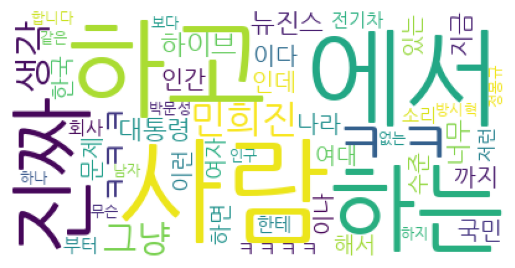

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 상위 50개 키워드 추출
vectorizer = CountVectorizer(max_features=50)
key_matrix = vectorizer.fit_transform(df['korean_reply'].fillna(''))
key_freq = dict(zip(vectorizer.get_feature_names_out(), key_matrix.sum(axis=0).A1))

# 워드클라우드 생성
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', background_color='white')
wordcloud = wordcloud.generate_from_frequencies(key_freq)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


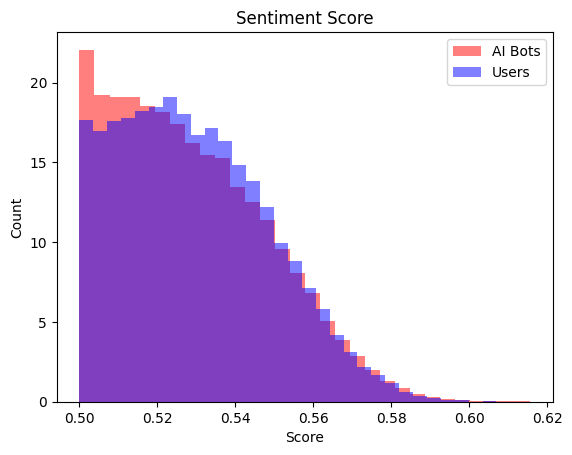

In [ ]:
# 감정 점수 비교 그래프
bot_scores = df[df['bot'] == 1]['sentiment_score']
user_scores = df[df['bot'] == 0]['sentiment_score']

plt.hist(bot_scores, bins=30, alpha=0.5, color='red', label='AI Bots', density=True)
plt.hist(user_scores, bins=30, alpha=0.5, color='blue', label='Users', density=True)
plt.title("Sentiment Score")
plt.xlabel("Score")
plt.ylabel("Count")
plt.legend()
plt.show()

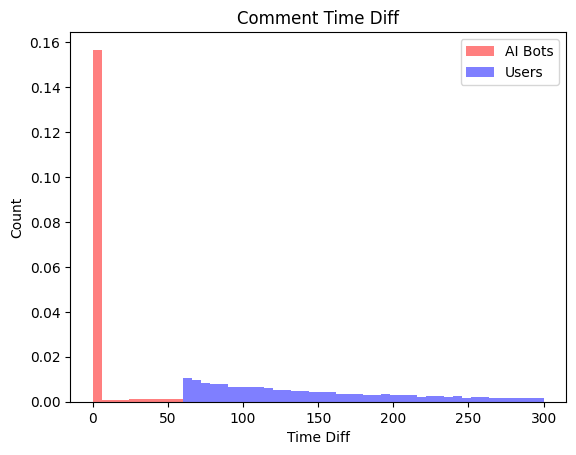

In [ ]:
# 시간 간격 비교
time_bot = df[df['bot'] == 1]['time_diff']
time_user = df[df['bot'] == 0]['time_diff']

plt.hist(time_bot, bins=50, color='red', alpha=0.5, label='AI Bots', range=(0, 300), density=True)
plt.hist(time_user, bins=50, color='blue', alpha=0.5, label='Users', range=(0, 300), density=True)
plt.title("Comment Time Diff")
plt.xlabel("Time Diff")
plt.ylabel("Count")
plt.legend()
plt.show()

AI봇의 특징
- 'ㅋㅋㅋ'와 같은 단어를 자주 사용
- 비교적 중립적인 감정 점수
- 댓글 간 시간 차이가 매우 짧음

In [ ]:
df.to_csv("유튜브 댓글 모음(전처리, ai봇 분류 완료).csv", index=False, encoding='utf-8-sig')

## AI 봇의 댓글에 대한 일반 사용자들의 반응


In [ ]:
# AI 봇의 댓글에 대한 사용자 반응
bot_comments = df[df['bot'] == 1]
user_comments = df[(df['Parent ID'].isin(bot_comments.index)) & (df['bot'] == 0)]

# 사용자 반응 감정 요약
replies_sentiment = user_comments['sentiment_label'].value_counts(normalize=True) * 100

print(replies_sentiment)

sentiment_label
LABEL_1    87.030026
LABEL_0    12.969974
Name: proportion, dtype: float64


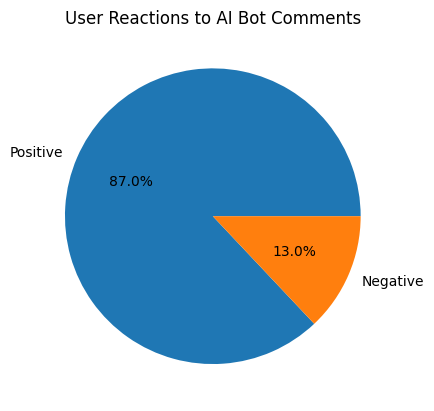

In [ ]:
import matplotlib.pyplot as plt

# 사용자 반응 감정 비율 시각화
labels = ['Positive', 'Negative']
sizes = replies_sentiment.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('User Reactions to AI Bot Comments')
plt.show()

In [ ]:
# AI 봇과 일반 사용자 댓글의 좋아요, 답글 수 비교
like_reply_summary = df.groupby('bot')[['Likes', 'Parent ID']].agg({
    'Likes': 'mean',
    'Parent ID': 'count'
})

like_reply = like_reply_summary.rename(columns={'Parent ID': 'Replies'})
like_reply.index = ['Users', 'AI Bots']

print(like_reply)

             Likes  Replies
Users    17.517038    27644
AI Bots  22.840343    90256


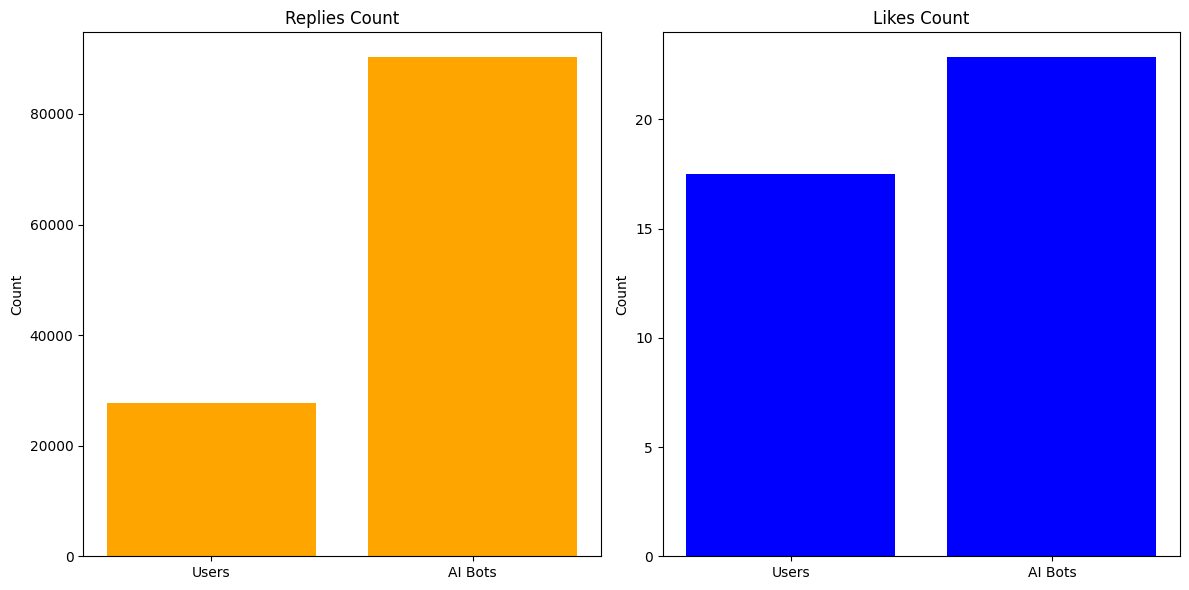

In [ ]:
# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 답글 비교 막대 그래프
axes[0].bar(like_reply.index, like_reply['Replies'], color='orange')
axes[0].set_title("Replies Count")
axes[0].set_ylabel("Count")
axes[0].set_xticks(range(len(like_reply.index)))
axes[0].set_xticklabels(like_reply.index)

# 좋아요 비교 막대 그래프
axes[1].bar(like_reply.index, like_reply['Likes'], color='blue')
axes[1].set_title("Likes Count")
axes[1].set_ylabel("Count")
axes[1].set_xticks(range(len(like_reply.index)))
axes[1].set_xticklabels(like_reply.index)

plt.tight_layout()
plt.show()

In [ ]:
# AI 봇과 사용자 댓글의 답글 비율 비교
comment_total = len(df)
bot_comments = df[df['bot'] == 1]
user_comments = df[df['bot'] == 0]

bot_replies = df[df['Parent ID'].isin(bot_comments.index)]
user_replies = df[df['Parent ID'].isin(user_comments.index)]

bot_reply = (len(bot_replies) / len(bot_comments)) * 100
user_reply = (len(user_replies) / len(user_comments)) * 100

print(bot_reply, user_reply)

116.61385392660877 45.75676457820865


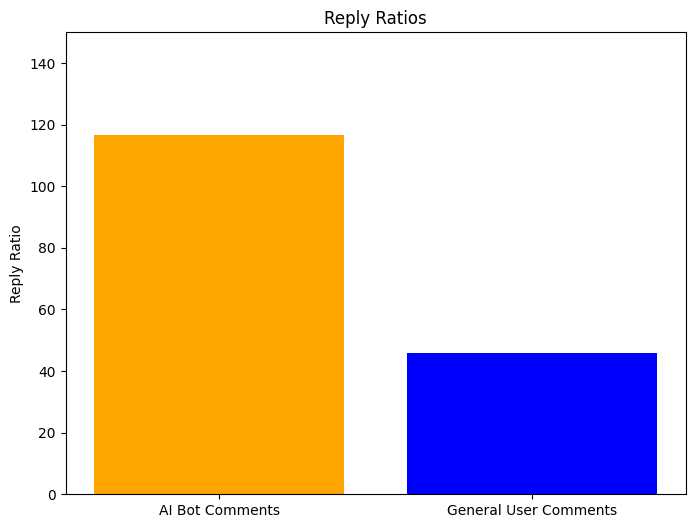

In [ ]:
# 시각화
reply_ratios = {'AI Bot Comments': bot_reply, 'General User Comments': user_reply}

plt.figure(figsize=(8, 6))
plt.bar(reply_ratios.keys(), reply_ratios.values(), color=['orange', 'blue'])
plt.ylabel('Reply Ratio')
plt.title('Reply Ratios')
plt.ylim(0, 150)
plt.show()


In [ ]:
df.to_csv("유튜브 댓글 모음(두번째 질문 완료).csv", index=False, encoding='utf-8-sig')

## 특정 주제(정치, 연예, 기술)에서 AI 봇과 일반 사용자의 차이

### 정치


In [ ]:
# 정치 분야 데이터 필터링
politics = df[df['Class'] == '정치']

politics_bot = politics[politics['bot'] == 1]
politics_user = politics[politics['bot'] == 0]

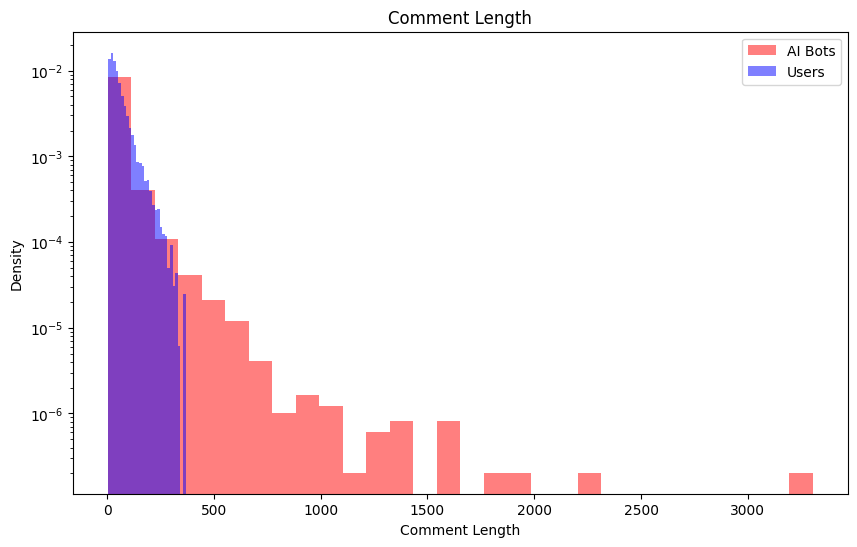

In [ ]:
# 댓글 길이 비교 시각화
plt.figure(figsize=(10, 6))
plt.hist(politics_bot['comment_length'], bins=30, alpha=0.5, label='AI Bots', color='red', density=True, log=True)
plt.hist(politics_user['comment_length'], bins=30, alpha=0.5, label='Users', color='blue', density=True, log=True)
plt.title('Comment Length')
plt.xlabel('Comment Length')
plt.ylabel('Density')
plt.legend()
plt.show()

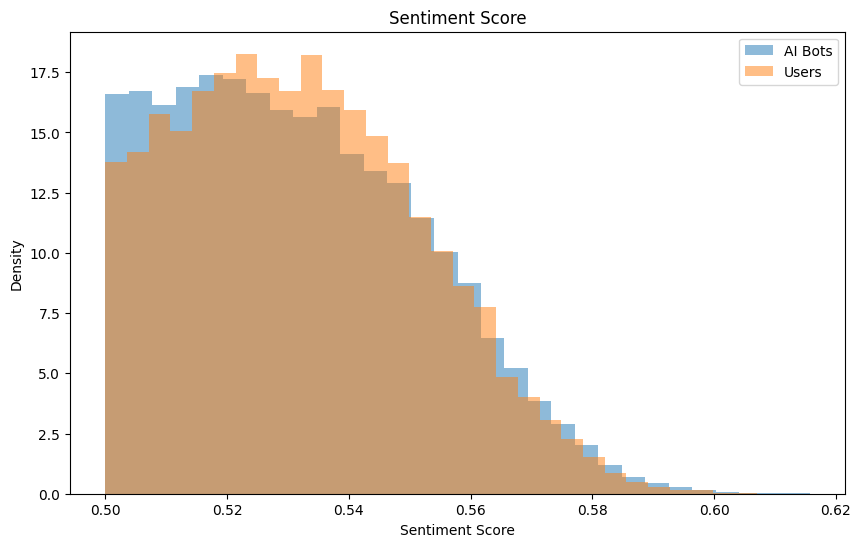

In [ ]:
# 감정 분석 분포 비교
plt.figure(figsize=(10, 6))
plt.hist(politics_bot['sentiment_score'], bins=30, alpha=0.5, label='AI Bots', density=True)
plt.hist(politics_user['sentiment_score'], bins=30, alpha=0.5, label='Users', density=True)
plt.title('Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend()
plt.show()

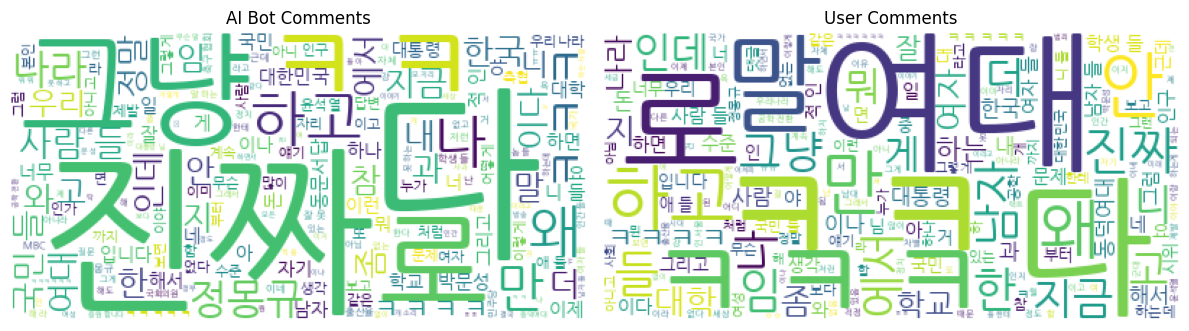

In [ ]:
# AI봇과 일반 사용자의 워드클라우드 생성
from wordcloud import WordCloud

bot_text = ' '.join(politics_bot['korean_reply'].dropna())
user_text = ' '.join(politics_user['korean_reply'].dropna())

# 워드클라우드 생성 함수
def make_wordcloud(text):
    return WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', background_color='white').generate(text)

wc_bot = make_wordcloud(bot_text)
wc_user = make_wordcloud(user_text)

plt.figure(figsize=(12, 6))

# AI 봇 워드클라우드
plt.subplot(1, 2, 1)
plt.imshow(wc_bot)
plt.title('AI Bot Comments')
plt.axis('off')

# 일반 사용자 워드클라우드
plt.subplot(1, 2, 2)
plt.imshow(wc_user)
plt.title('User Comments')
plt.axis('off')

plt.tight_layout()
plt.show()

### 연예

In [ ]:
# 연예 분야 데이터 필터링
entertainment = df[df['Class'] == '연예']

entertainment_bot = entertainment[entertainment['bot'] == 1]
entertainment_user = entertainment[entertainment['bot'] == 0]

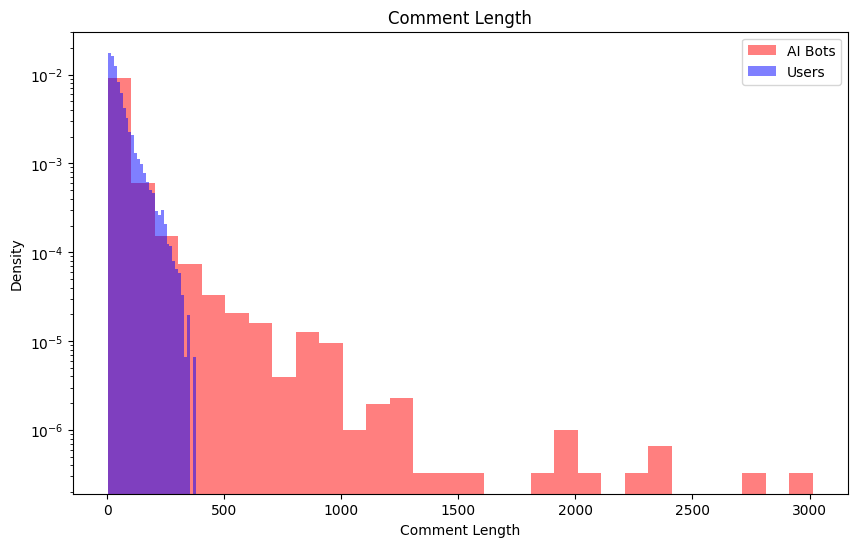

In [ ]:
# 댓글 길이 비교 시각화
plt.figure(figsize=(10, 6))
plt.hist(entertainment_bot['comment_length'], bins=30, alpha=0.5, label='AI Bots', color='red', density=True, log=True)
plt.hist(entertainment_user['comment_length'], bins=30, alpha=0.5, label='Users', color='blue', density=True, log=True)
plt.title('Comment Length')
plt.xlabel('Comment Length')
plt.ylabel('Density')
plt.legend()
plt.show()

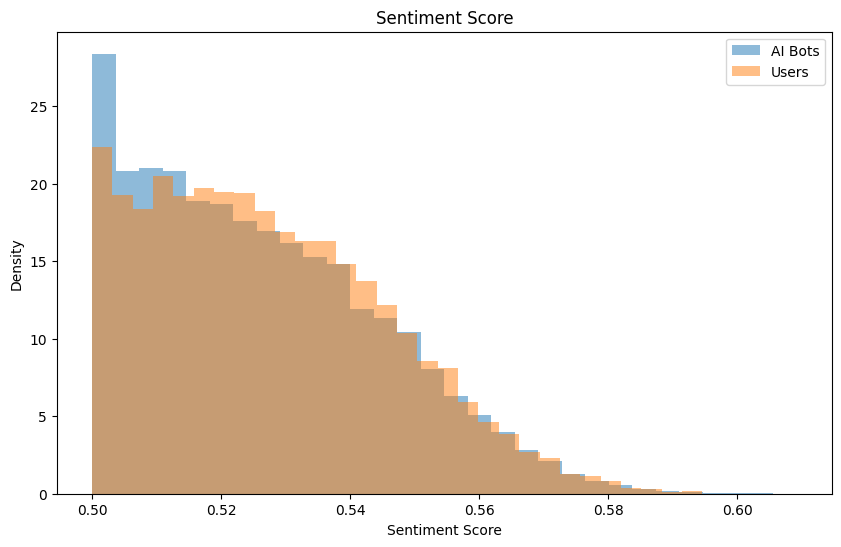

In [ ]:
# 감정 분석 분포 비교
plt.figure(figsize=(10, 6))
plt.hist(entertainment_bot['sentiment_score'], bins=30, alpha=0.5, label='AI Bots', density=True)
plt.hist(entertainment_user['sentiment_score'], bins=30, alpha=0.5, label='Users', density=True)
plt.title('Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend()
plt.show()

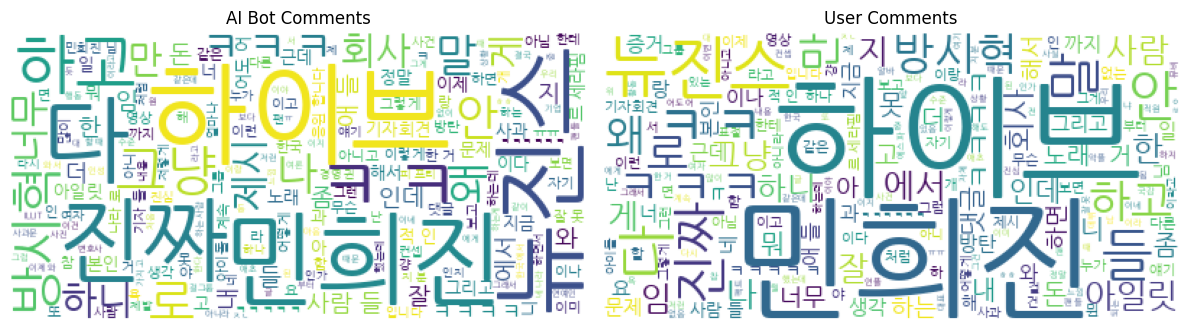

In [ ]:
# AI봇과 일반 사용자의 워드클라우드 생성
from wordcloud import WordCloud

bot_text = ' '.join(entertainment_bot['korean_reply'].dropna())
user_text = ' '.join(entertainment_user['korean_reply'].dropna())

# 워드클라우드 생성 함수
def make_wordcloud(text):
    return WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', background_color='white').generate(text)

wc_bot = make_wordcloud(bot_text)
wc_user = make_wordcloud(user_text)

plt.figure(figsize=(12, 6))

# AI 봇 워드클라우드
plt.subplot(1, 2, 1)
plt.imshow(wc_bot)
plt.title('AI Bot Comments')
plt.axis('off')

# 일반 사용자 워드클라우드
plt.subplot(1, 2, 2)
plt.imshow(wc_user)
plt.title('User Comments')
plt.axis('off')

plt.tight_layout()
plt.show()

### 기술

In [ ]:
# 기술 분야 데이터 필터링
tech = df[df['Class'] == '기술']

tech_bot = tech[tech['bot'] == 1]
tech_user = tech[tech['bot'] == 0]

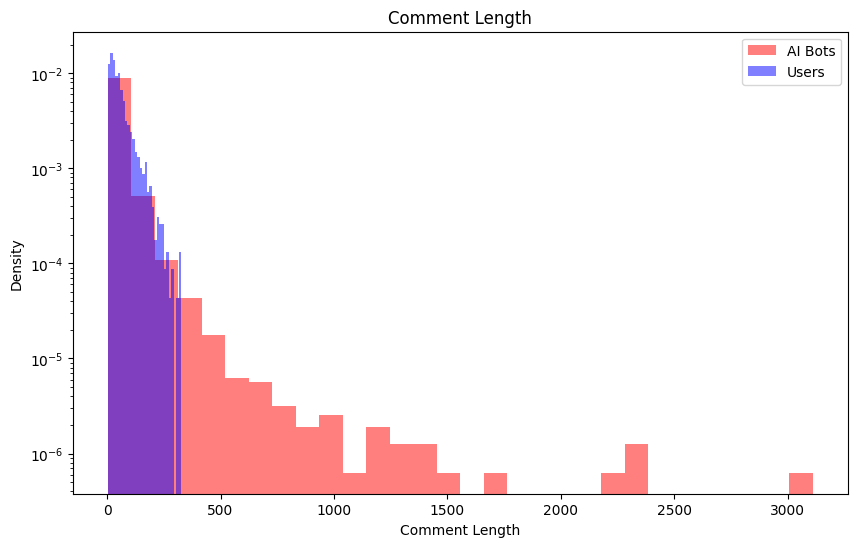

In [ ]:
# 댓글 길이 비교 시각화
plt.figure(figsize=(10, 6))
plt.hist(tech_bot['comment_length'], bins=30, alpha=0.5, label='AI Bots', color='red', density=True, log=True)
plt.hist(tech_user['comment_length'], bins=30, alpha=0.5, label='Users', color='blue', density=True, log=True)
plt.title('Comment Length')
plt.xlabel('Comment Length')
plt.ylabel('Density')
plt.legend()
plt.show()

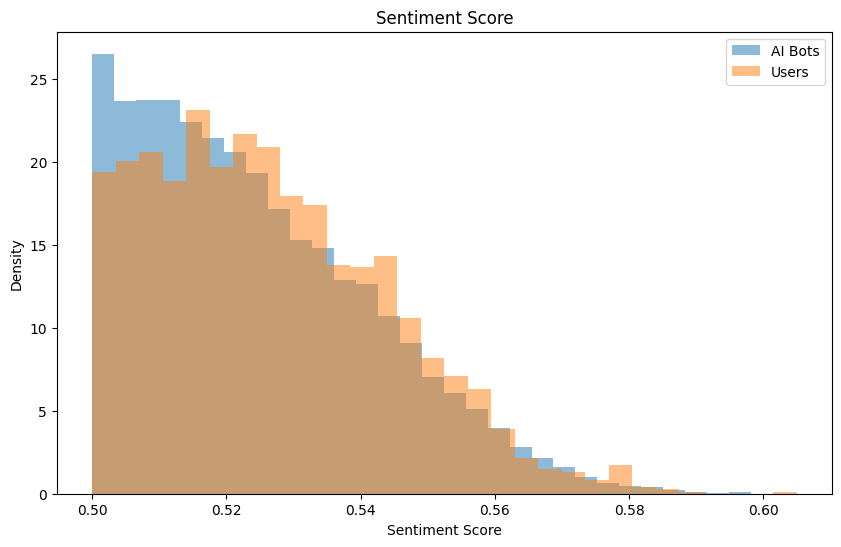

In [ ]:
# 감정 분석 분포 비교
plt.figure(figsize=(10, 6))
plt.hist(tech_bot['sentiment_score'], bins=30, alpha=0.5, label='AI Bots', density=True)
plt.hist(tech_user['sentiment_score'], bins=30, alpha=0.5, label='Users', density=True)
plt.title('Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend()
plt.show()

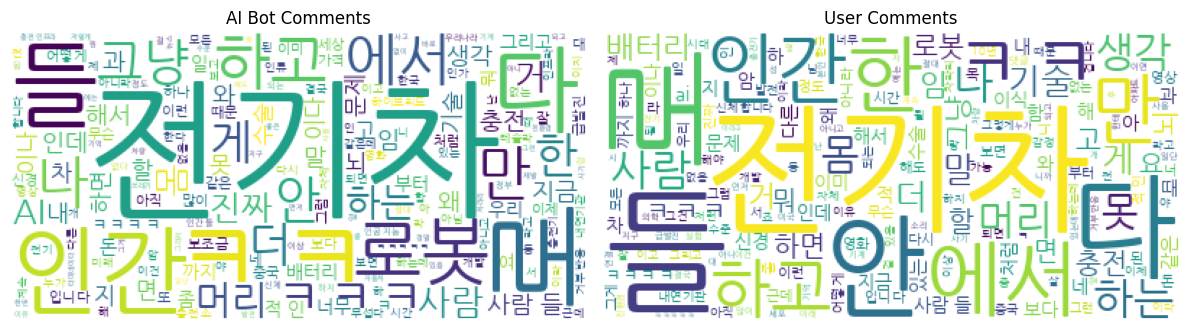

In [ ]:
# AI봇과 일반 사용자의 워드클라우드 생성
from wordcloud import WordCloud

bot_text = ' '.join(tech_bot['korean_reply'].dropna())
user_text = ' '.join(tech_user['korean_reply'].dropna())

# 워드클라우드 생성 함수
def make_wordcloud(text):
    return WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', background_color='white').generate(text)

wc_bot = make_wordcloud(bot_text)
wc_user = make_wordcloud(user_text)

plt.figure(figsize=(12, 6))

# AI 봇 워드클라우드
plt.subplot(1, 2, 1)
plt.imshow(wc_bot)
plt.title('AI Bot Comments')
plt.axis('off')

# 일반 사용자 워드클라우드
plt.subplot(1, 2, 2)
plt.imshow(wc_user)
plt.title('User Comments')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df.to_csv("유튜브 댓글 모음(세번째 질문 완료).csv", index=False, encoding='utf-8-sig')